# Capstone Project - Car Accident Severity
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)


## Introduction: Business Problem <a name="introduction"></a>

Since 2004, the city of Seattle, Washington, sees every year more than 10.000 traffic collisions. In consequence, on average, 21 families lose someone who loves because of the fatality of the accident and 5069 people get some kind of injury. 

The Government of Seattle has launched the "Vision Zero" program which aims to end traffic deaths and serious injuries on the city streets by 2030. The foundation of the project is "traffic collisions aren't accidents - they're preventable through smarter street design, targeted enforcement, partnerships, and thoughtful public engagement". 

This report aims to identify how internal and external conditions relate to car collisions and to calculate the probability of getting property damage or get injured in a car accident. This information might be used in street signs to alert drivers and strengthen an attentive driving. 

The targets of the proyect are the Seattle Department of Transportation and other public or private organization working on decrease de number of traffic accidents in Seattle, Washington.

## Data <a name="data"></a>

In this report we will use the open data provided for the [Governament of Seattle](https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?geometry=-123.198%2C47.452%2C-121.464%2C47.776&selectedAttribute=INATTENTIONIND). The dataset includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present.

You can read the atributte documentatio [here](https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?geometry=-123.198%2C47.452%2C-121.464%2C47.776&selectedAttribute=INATTENTIONIND)

### Understanding the business problem

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\Usuario\Documents\Data Science\Cursos\IBM\Course 9\Collisions.csv")

In [3]:
df.shape

(221266, 40)

In [4]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df.sort_values('INCDATE', inplace=True)
df.reset_index(drop=True, inplace=True)
df['YEAR'] = df['INCDATE'].dt.year

In [6]:
df['YEAR'].value_counts().sort_index()

2003        1
2004    15457
2005    16016
2006    15794
2007    15082
2008    14139
2009    13275
2010    11958
2011    12416
2012    12732
2013    12757
2014    13212
2015    14260
2016    13955
2017    12477
2018    12198
2019    11204
2020     4333
Name: YEAR, dtype: int64

In [7]:
df.drop(df[df['YEAR']==2020].index, inplace=True)
df.drop(df[df['YEAR']==2003].index, inplace=True)

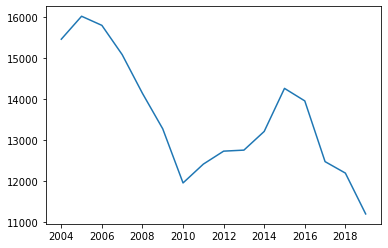

In [8]:
df['YEAR'].value_counts().sort_index().plot()

In [9]:
round(np.mean(df['YEAR'].value_counts()),0)

13558.0

In [10]:
df['SEVERITYCODE'].value_counts(normalize=True)

1     0.621981
2     0.265103
0     0.097473
2b    0.013880
3     0.001563
Name: SEVERITYCODE, dtype: float64

We have not a detailed description of the severity of the collision or collision type. Because of that we should drop every line of data with severitycode == 0. 


In [11]:
df.drop(df[df['SEVERITYCODE']=='0'].index, inplace=True)
df['SEVERITYCODE'].value_counts(normalize=True)

1     0.689156
2     0.293734
2b    0.015379
3     0.001731
Name: SEVERITYCODE, dtype: float64

In [12]:
df.shape

(195787, 41)

In [13]:
round(np.sum(df['FATALITIES']>=1)/len(df['YEAR'].unique()),0)

21.0

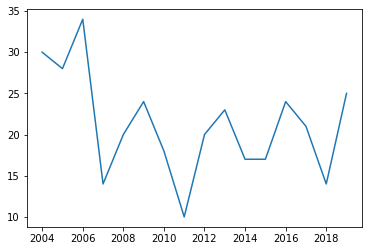

In [14]:
df[df['FATALITIES']>=1]['YEAR'].value_counts().sort_index().plot(kind='line')

In [15]:
round(np.sum(df['SERIOUSINJURIES']>=1)/len(df['YEAR'].unique()),0)

189.0

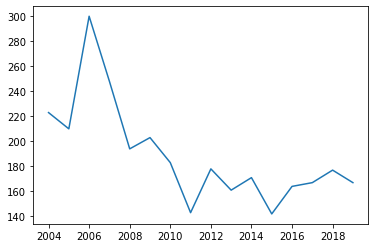

In [16]:
df[df['SERIOUSINJURIES']>=1]['YEAR'].value_counts().sort_index().plot(kind='line')

In [17]:
round(np.sum(df['INJURIES'])/len(df['YEAR'].unique()),0)

5069.0

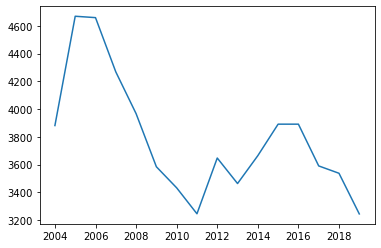

In [18]:
df[df['INJURIES']>=1]['YEAR'].value_counts().sort_index().plot(kind='line')

### Selecting features

For the first step analysis we will select features which describe the internal and external condition:

1) Internal
 - INATTENTIONIND: Whether or not collision was due to inattention(Y/N) 
 - UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol.
 - SPEEDING: Whether or not speeding was a factor in the collision. (Y/N)

2) External
 - WEATHER: A description of the weather conditions during the time of the collision. 
 - ROADCOND: The condition of the road during the collision.
 - LIGHTCOND: The light conditions during the collision. 
 - PEDROWNOTGRNT: Whether or not the pedestrian right of way was not granted. (Y/N)
 

Let's examine how many missing values are in those columns.

In [19]:
for c in ['INATTENTIONIND','UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT']:
    print(c + ': ', df[c].isnull().sum())

INATTENTIONIND:  165599
UNDERINFL:  3921
SPEEDING:  186076
WEATHER:  4119
ROADCOND:  4049
LIGHTCOND:  4214
PEDROWNOTGRNT:  190678


Features with high number of missing values like INATTENTIONIND, SPEEDING, PEDROWNOTGRNT will be useless for the analysis. Will be only focus on UNDERINFL, WEATHER, ROADCOND, LIGHTCOND. 

Let's zoom in the columns selected.

#### Road Condition

In [20]:
df['ROADCOND'].value_counts()

Dry               126306
Wet                47755
Unknown            15067
Ice                 1220
Snow/Slush          1003
Other                131
Standing Water       117
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

Will should treat the Unknonw and Other Category as missin values

In [21]:
df['ROADCOND'].replace('Unknown', np.nan, inplace=True)

In [22]:
df['ROADCOND'].replace('Other', np.nan, inplace=True)

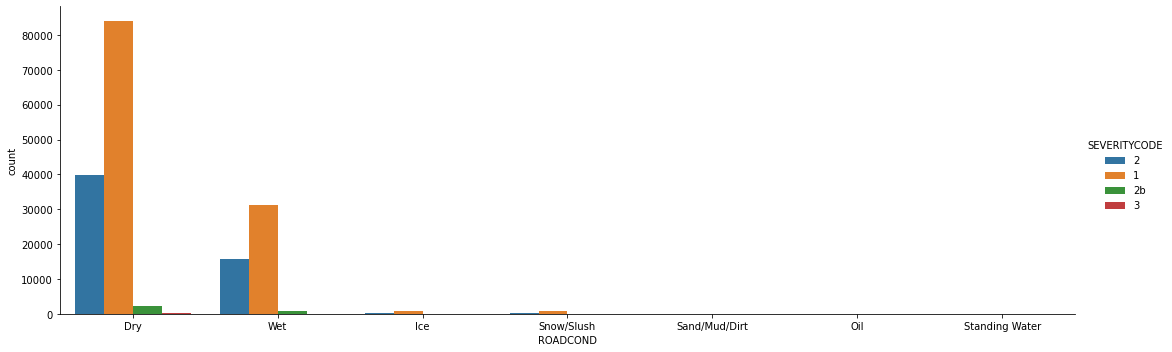

In [23]:
sns.catplot(x='ROADCOND', hue='SEVERITYCODE', kind='count', data=df, height=5, aspect=3)

#### Under Influence

In [24]:
df['UNDERINFL'].value_counts()

N    100561
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

Will should replace N for 0 and Y for 1

In [25]:
df['UNDERINFL'].replace('N', '0', inplace=True)

In [26]:
df['UNDERINFL'].replace('Y', '1', inplace=True)

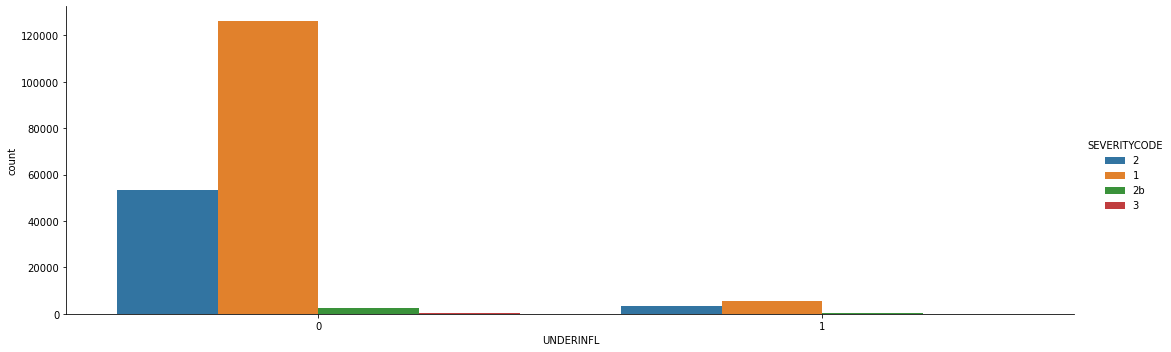

In [27]:
sns.catplot(x='UNDERINFL', hue='SEVERITYCODE', kind='count', data=df, height=5, aspect=3)

#### Weather Condition

In [28]:
df['WEATHER'].value_counts()

Clear                       112775
Raining                      33375
Overcast                     27908
Unknown                      15131
Snowing                        896
Other                          815
Fog/Smog/Smoke                 575
Sleet/Hail/Freezing Rain       111
Blowing Sand/Dirt               56
Severe Crosswind                26
Name: WEATHER, dtype: int64

Will should treat the Unknonw and Other Category as missin values

In [29]:
df['WEATHER'].replace('Unknown', np.nan, inplace=True)

In [30]:
df['WEATHER'].replace('Other', np.nan, inplace=True)

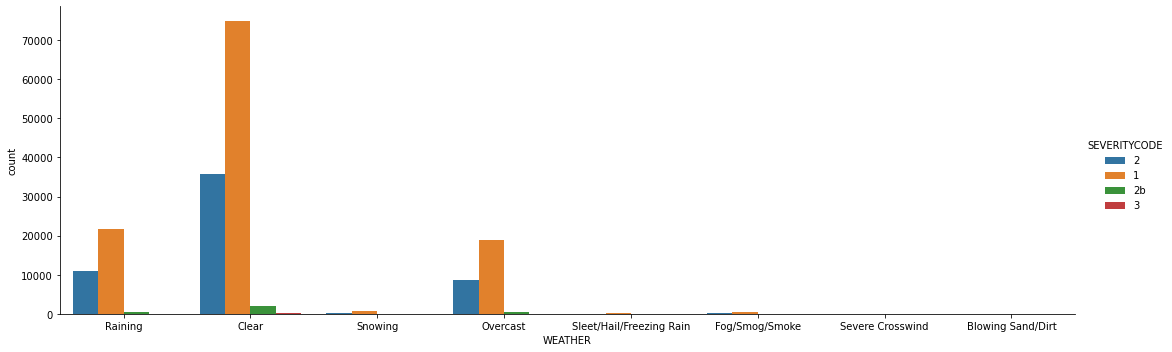

In [31]:
sns.catplot(x='WEATHER', hue='SEVERITYCODE', kind='count', data=df, height=5, aspect=3)

#### Light Condition

In [32]:
df['LIGHTCOND'].value_counts()

Daylight                    117331
Dark - Street Lights On      49239
Unknown                      13468
Dusk                          5982
Dawn                          2543
Dark - No Street Lights       1547
Dark - Street Lights Off      1225
Other                          238
Name: LIGHTCOND, dtype: int64

Will should treat the Unknonw and Other Category as missin values

In [33]:
df['LIGHTCOND'].replace('Unknown', np.nan, inplace=True)

In [34]:
df['LIGHTCOND'].replace('Other', np.nan, inplace=True)

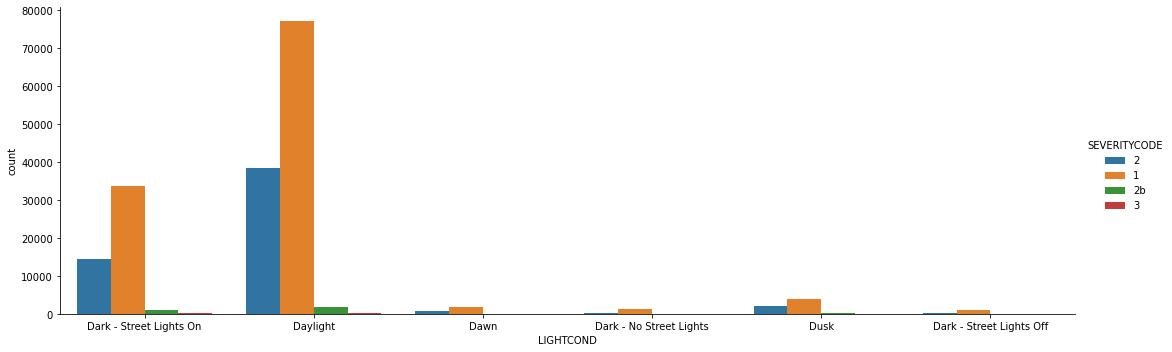

In [35]:
sns.catplot(x='LIGHTCOND', hue='SEVERITYCODE', kind='count', data=df, height=5, aspect=3)

#### Day and Time

Let's look if there some conection between number of collisions and weekdays.

In [36]:
df['DAY'] = df['INCDATE'].dt.dayofweek

In [37]:
df['DAY'].value_counts().sort_index()

0    26473
1    28768
2    28922
3    29470
4    32467
5    27553
6    22134
Name: DAY, dtype: int64

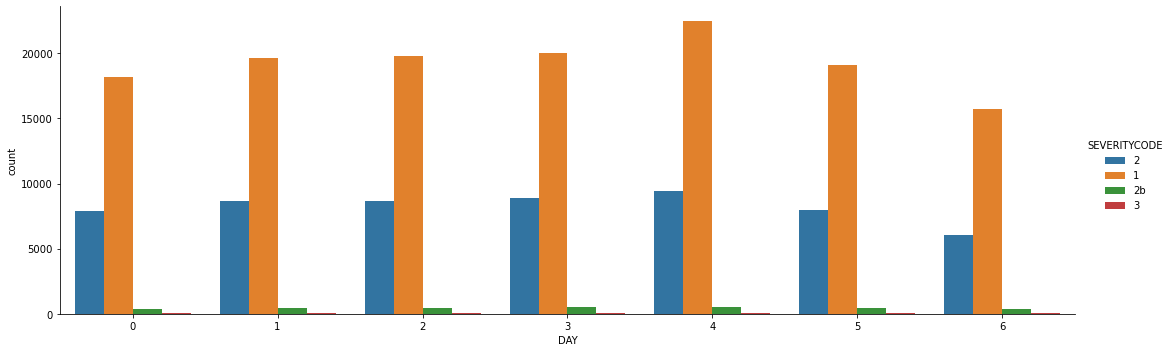

In [38]:
sns.catplot(x='DAY', hue='SEVERITYCODE', kind='count', data=df, height=5, aspect=3)

There is no much difference between day so there is no need to include day of week into features list.

Let's look for time relationship.

In [39]:
df['INCDTTM'].value_counts()

11/2/2006                100
10/3/2008                 92
11/5/2005                 84
12/4/2004                 76
6/1/2006                  75
                        ... 
6/28/2013 11:28:00 AM      1
2/11/2004 11:30:00 AM      1
11/8/2010 3:28:00 PM       1
5/18/2006 6:20:00 PM       1
9/28/2017 4:23:00 PM       1
Name: INCDTTM, Length: 163471, dtype: int64

In [40]:
mask= (df['INCDTTM'].str.contains('AM'))| (df['INCDTTM'].str.contains('PM'))

In [41]:
df.loc[~mask, 'INCDTTM'] = np.nan

In [42]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [43]:
df['HOUR'] = df['INCDTTM'].dt.hour

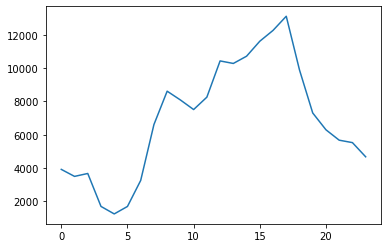

In [44]:
df['HOUR'].value_counts().sort_index().plot()

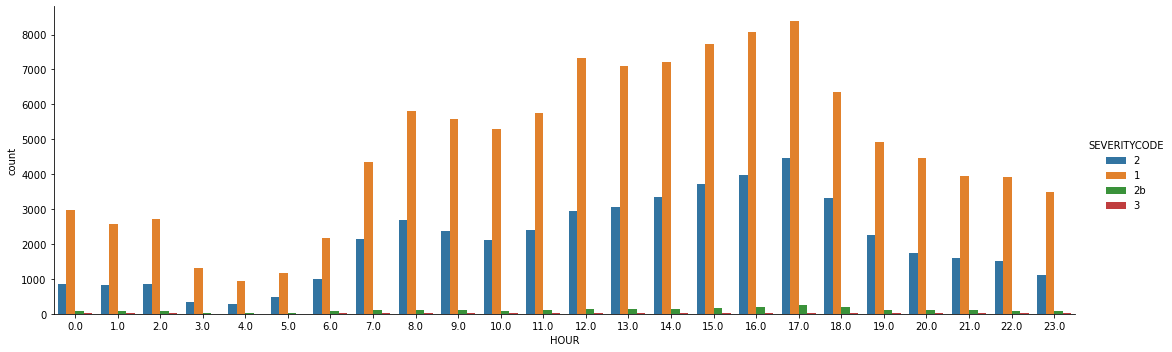

In [45]:
sns.catplot(x='HOUR', hue='SEVERITYCODE', kind='count', data=df, height=5, aspect=3)

In [46]:
df['WORKH']= df['HOUR'].apply(lambda x: 1 if (7<=x<=19)  else 0)

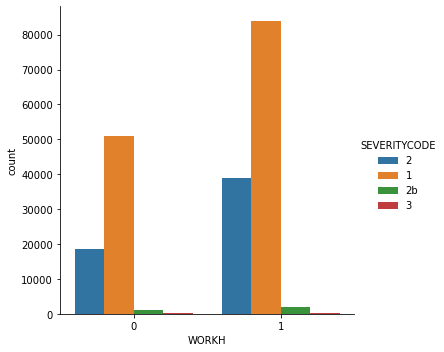

In [47]:
sns.catplot(x='WORKH', hue='SEVERITYCODE', kind='count', data=df)